### Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd
import os

In [180]:
#Lading the dataset
os.chdir(r"D:\KAGGLE DS\Beverage Sales")
raw_data=pd.read_csv("synthetic_beverage_sales_data.csv")
raw_data.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [181]:
#copy the data
import matplotlib.pyplot as plt
data=raw_data.copy()

### Data Cleaning and preprocessing

In [182]:
#checking for null values
data.isnull().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

In [183]:
#database summary
data.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


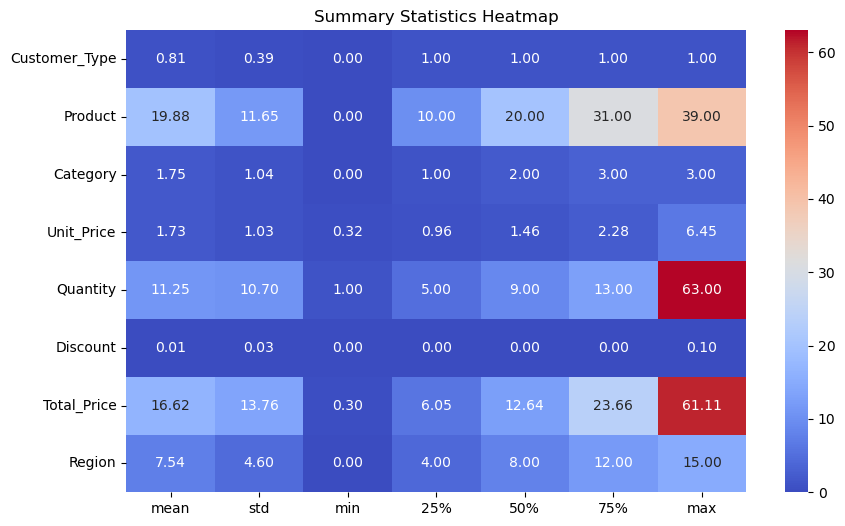

Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
dtype: int64

In [184]:
desc = df.describe().T
plt.figure(figsize=(10, 6))
sns.heatmap(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Summary Statistics Heatmap')
plt.show()

df.isnull().sum()

The heatmap above shows the descriptive statistics of the data and its importance it is usefull for detecting outliers 

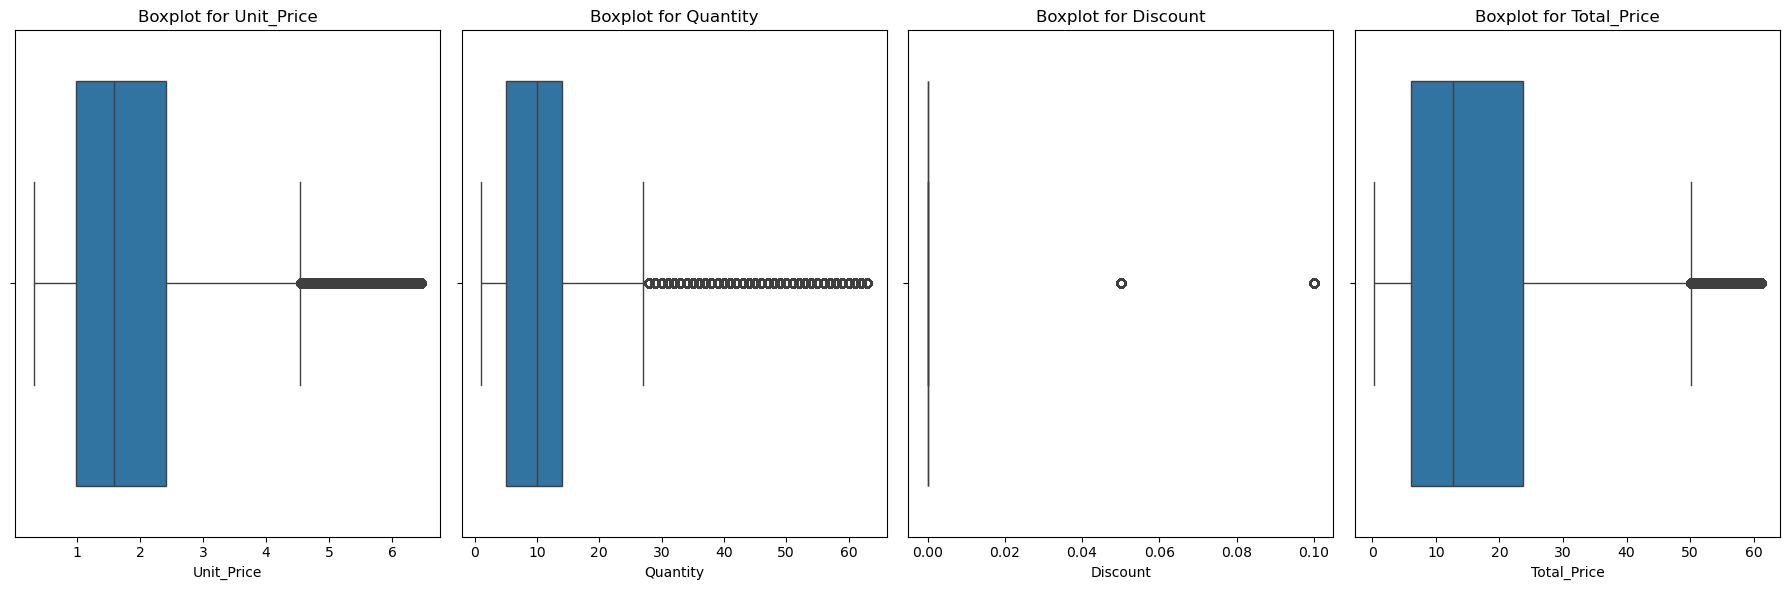

In [185]:
import seaborn as sns
def remove_outliers(df):
    num_columns = len(df.select_dtypes(include=['float64', 'int64']).columns)
    
    fig, axes = plt.subplots(1, num_columns, figsize=(18, 6))
    
    for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot for {column}')
    
    plt.tight_layout()
    plt.show()
    
    return df

data = remove_outliers(data)

The anomalies (high or low values) in the above box plots are outliers and can skew the general outcomes and leading to misguided conclusions.

### EDA

In [186]:
# Get unique type of customers 
print(data['Customer_Type'].unique())

# Count occurrences of each type of customers
b2b_count = (data['Customer_Type'] == 'B2B').sum()
b2c_count = (data['Customer_Type'] == 'B2C').sum()
#b2c_count = (data['Customer_Type'] == 'Both').sum()
print(f"{b2b_count},{b2c_count}")

['B2B' 'B2C']
1178808,5094008


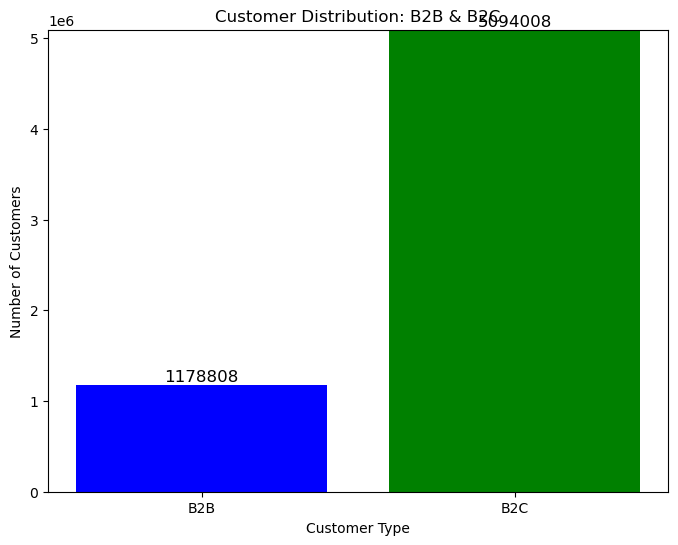

In [187]:
# Create a bar graph for customer type
categories = ['B2B', 'B2C']
counts = [b2b_count, b2c_count]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])

# Annotating the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12, color='black')

plt.title('Customer Distribution: B2B & B2C')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.ylim(0, max(counts) + 5)
plt.show()


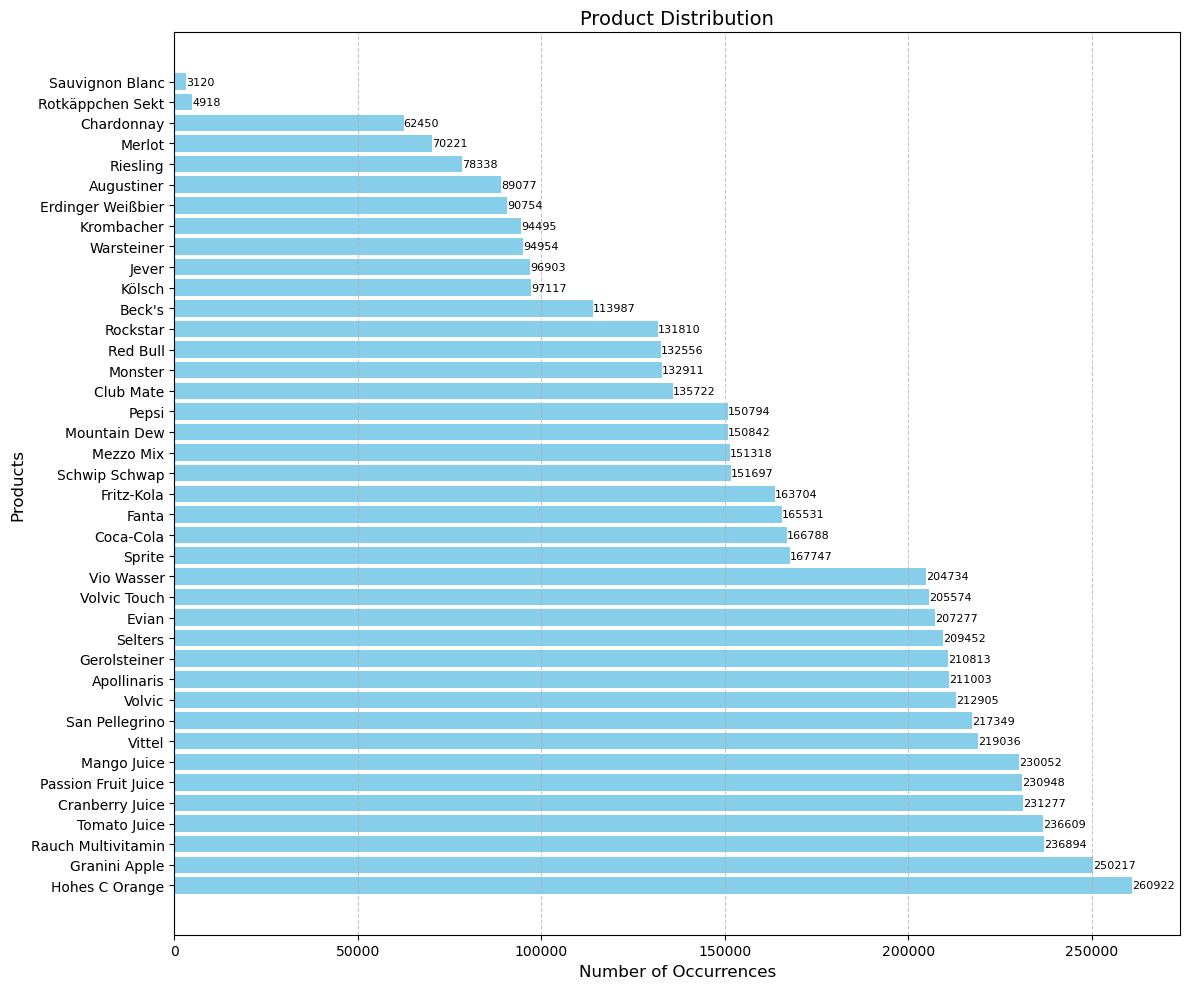

In [188]:
# Get unique type of products available 
data['Product'].unique()
product_counts = data['Product'].value_counts()

# plotting a horizontal bar graph
plt.figure(figsize=(12, 10))
plt.barh(product_counts.index, product_counts.values, color='skyblue')

# Annotate the bars
for i, count in enumerate(product_counts.values):
    plt.text(count + 0.5, i, str(count), va='center', fontsize=8, color='black')

plt.title('Product Distribution', fontsize=14)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The horizontal bar graph above tells various types of baverages available for each category the most selling product  is Hones C Orange and the least selling is Sauvignon Blanc

In [189]:
# Different categories of vereages available are displayed
print(data['Category'].unique())

['Water' 'Soft Drinks' 'Juices' 'Alcoholic Beverages']


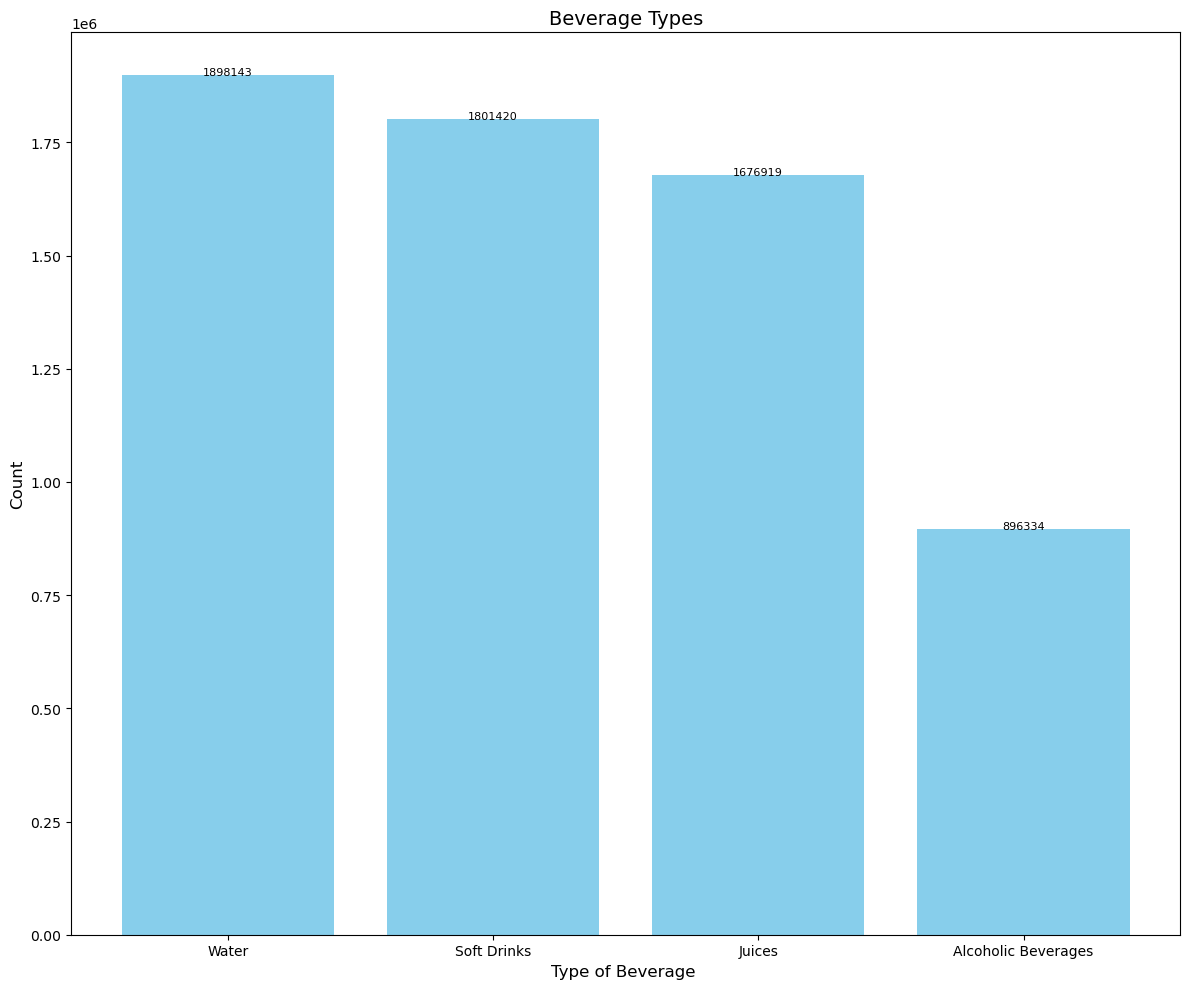

In [190]:
data['Category'].unique()
product_counts = data['Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 10))
plt.bar(product_counts.index, product_counts.values, color='skyblue')

# Annotate the bars
for i, count in enumerate(product_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=8, color='black')

# Set the title and labels
plt.title('Beverage Types', fontsize=14)
plt.xlabel('Type of Beverage ', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

The plot above shows different types of beverages available for each category the most variety of beverage available is for Water and the least for Alcoholic Beverages

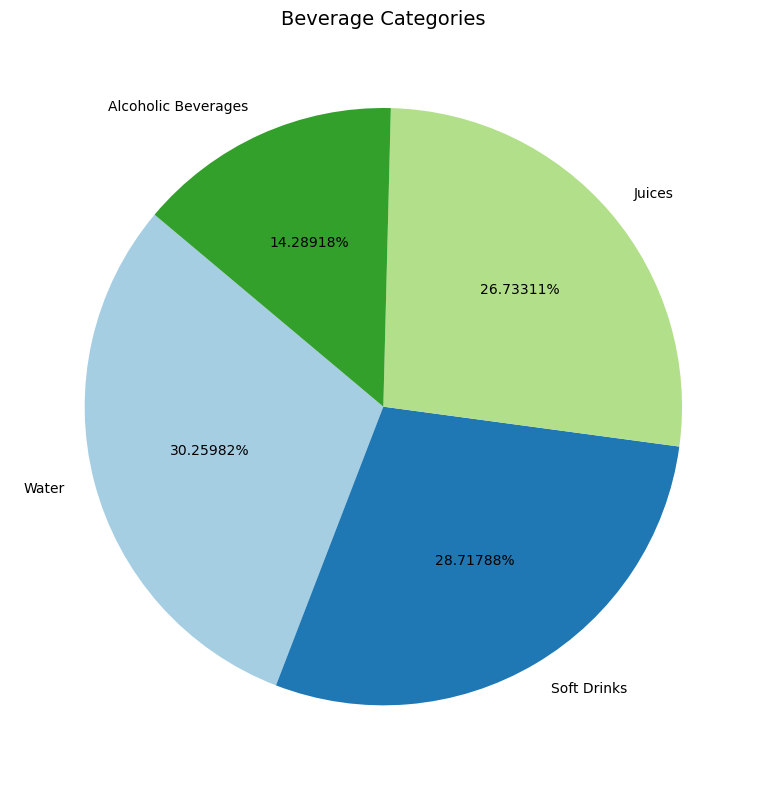

In [191]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    product_counts.values, 
    labels=product_counts.index, 
    autopct='%1.5f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)

# Set the title
plt.title('Beverage Categories', fontsize=14)
plt.tight_layout()
plt.show()

The pie chart shows the distribution for each category 

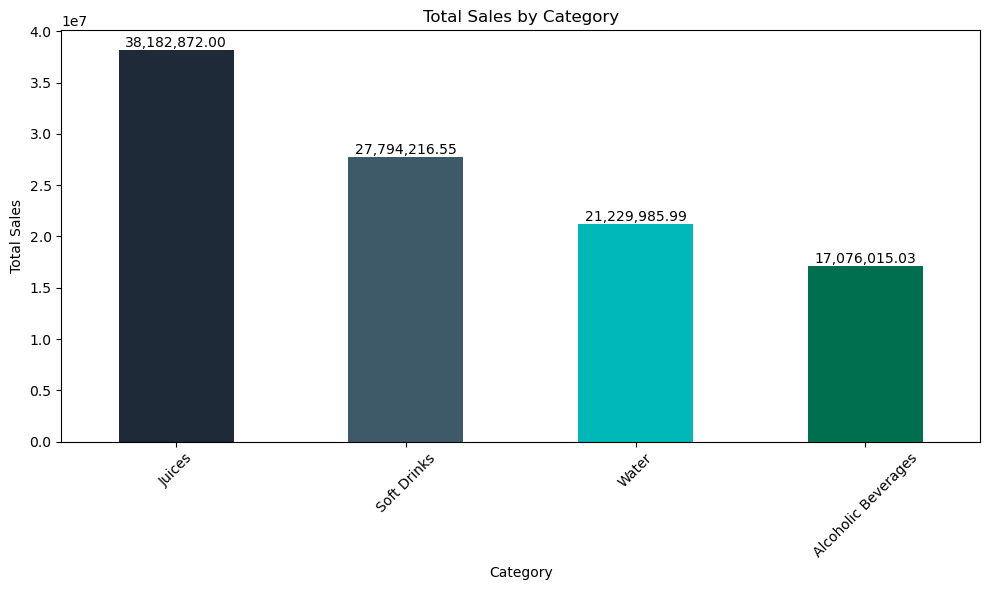

In [192]:
colors = ['#1e2a38', '#3e5968', '#00b8b8', '#006f4f', '#2b3d4f', '#4f6f7e', '#00a5a5', '#005b46', '#284f63', '#5f797b']
# Groupping categories of each product and Plotting with the price for each category 
category_sales = data.groupby('Category')['Total_Price'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = category_sales.plot(kind='bar', color=colors[:len(category_sales)])

# Add values at the top of each bar
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height() + 1,  # Y-coordinate (slightly above the bar)
        f'{bar.get_height():,.2f}',  # Value text (formatted)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10  # Font size
    )

# Add titles and labels
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart above tells the total sales of each category the most profit is earned by Juices though sold less less than water but the cost covers tha gap making it with highest sales and alcoholic beverages with least sale

In [193]:
h20=data[['Product','Category']]
h20=h20.head(500)
h20.head()

,Product,Category
4,Gerolsteiner,Water
7,Vittel,Water
9,Evian,Water
10,Mountain Dew,Soft Drinks
11,Hohes C Orange,Juices


product_price=data[['Product','Category']]
product_price.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_10116\3994583348.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


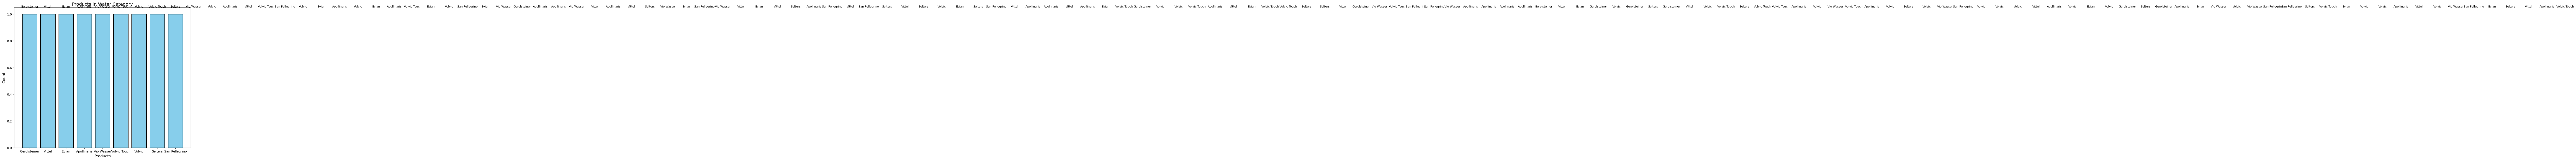

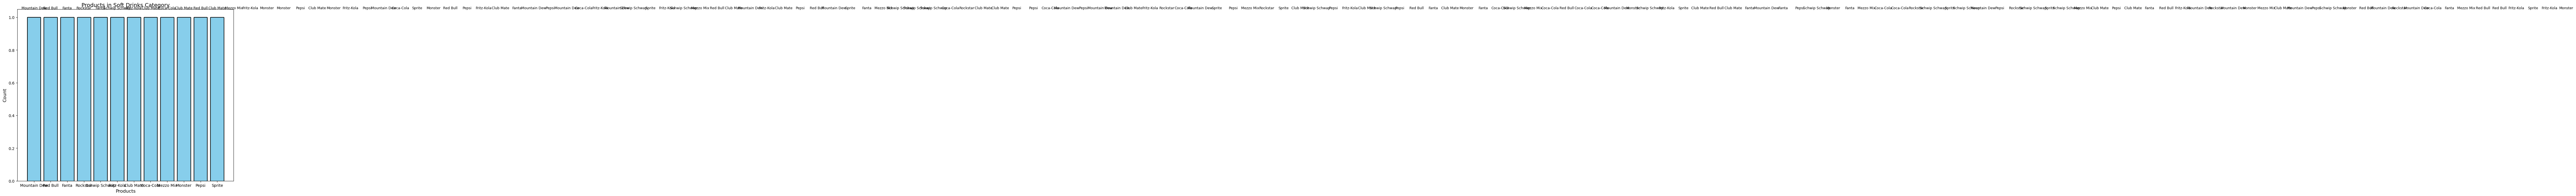

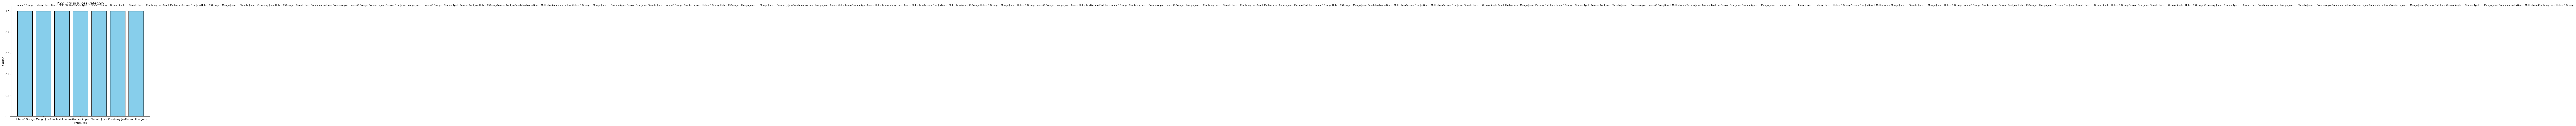

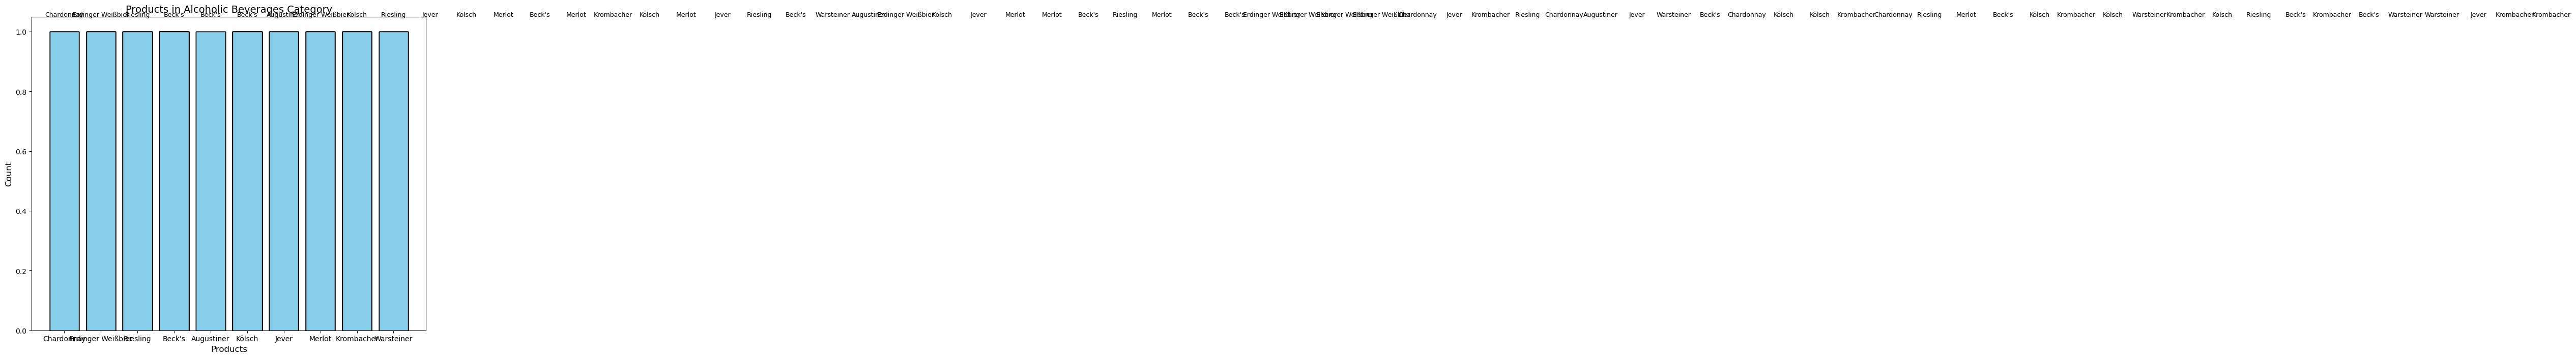

In [196]:
categories = h20['Category'].unique()

# Create separate plots for each category
for category in categories:
    # Filter data for the current category
    category_data = h20[h20['Category'] == category]
    
    # Plot the products within this category
    plt.figure(figsize=(10, 8))
    plt.bar(category_data['Product'], [1] * len(category_data), color='skyblue', edgecolor='black')

    # Add annotations
    for i, product in enumerate(category_data['Product']):
        plt.text(i, 1.05, product, ha='center', fontsize=9, color='black')

    # Set titles and labels
    plt.title(f'Products in {category} Category', fontsize=14)
    plt.xlabel('Products', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


THe code above will plot beverage sold most among each category leading to category wise sale visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_10116\147320495.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(product_prices.index, rotation=45, ha="right")
C:\Users\HP\AppData\Local\Temp\ipykernel_10116\147320495.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(product_prices.index, rotation=45, ha="right")
C:\Users\HP\AppData\Local\Temp\ipykernel_10116\147320495.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(product_prices.index, rotation=45, ha="right")
C:\Users\HP\AppData\Local\Temp\ipykernel_10116\147320495.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(product

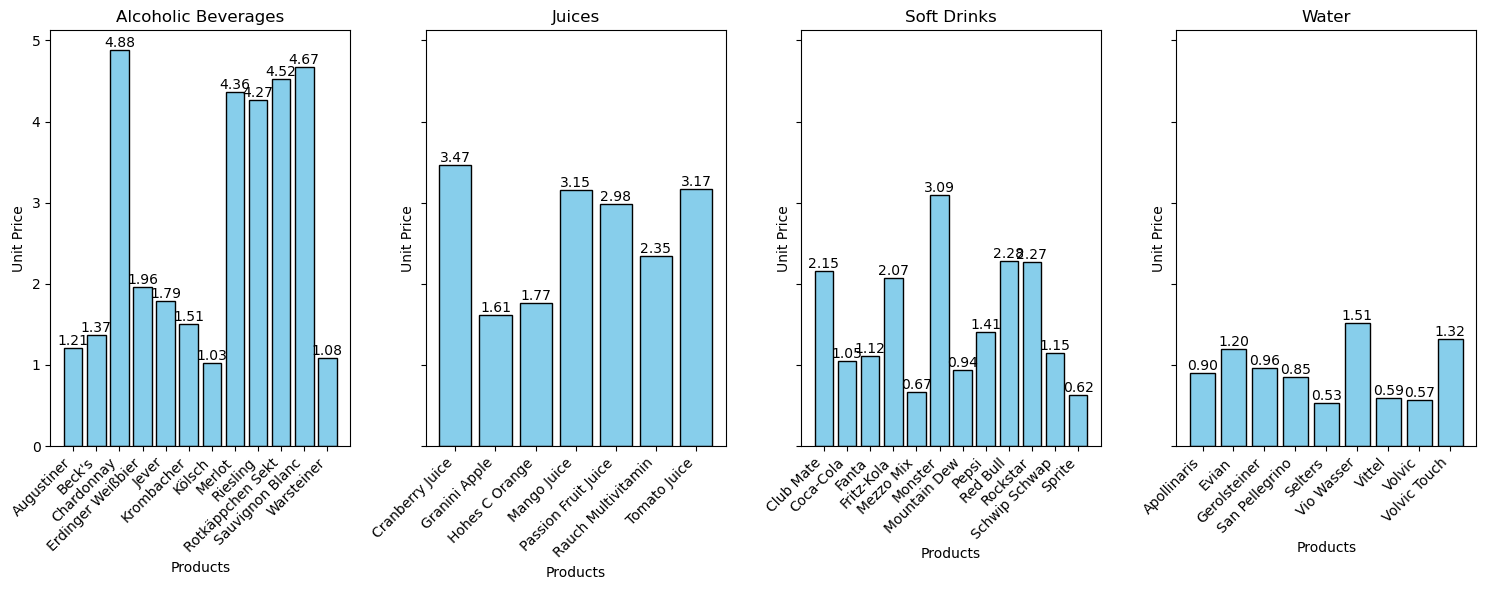

In [198]:
import random
# Sample a subset of the data (e.g., 1,000 entries)
sample_size = 1000000
sampled_df = data.sample(n=sample_size, random_state=42)

# Group by category
categories = sampled_df.groupby("Category")

# Create subplots for each category
fig, axes = plt.subplots(1, len(categories), figsize=(15, 6), sharey=True)

if len(categories) == 1:  # Ensure axes is iterable even if there's one category
    axes = [axes]

for ax, (category, group) in zip(axes, categories):
    # Aggregate prices for products (if there are duplicates in the sample)
    product_prices = group.groupby("Product")["Unit_Price"].mean()
    
    # Plot
    bars = ax.bar(product_prices.index, product_prices.values, color="skyblue", edgecolor="black")
    ax.set_title(f"{category}")
    ax.set_xlabel("Products")
    ax.set_ylabel("Unit Price")
    ax.set_xticklabels(product_prices.index, rotation=45, ha="right")
    
    # Add values at the top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


The plot will help us visualise the sale of each product under each category

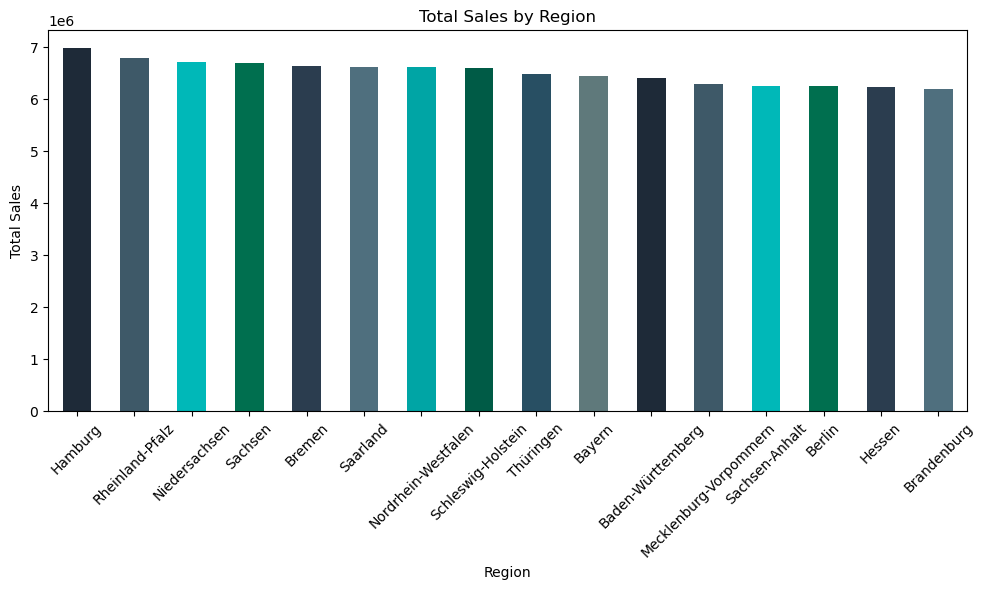

In [199]:
#Groupping the data region wise to get sales at each region
region_sales = data.groupby('Region')['Total_Price'].sum().sort_values(ascending=False)
# Plotting the graph
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color=colors[:len(region_sales)])
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot above helps visualise the sales of all the bevearages at a region 

For the detail sales of each category in a region we use a pi plot as shown below

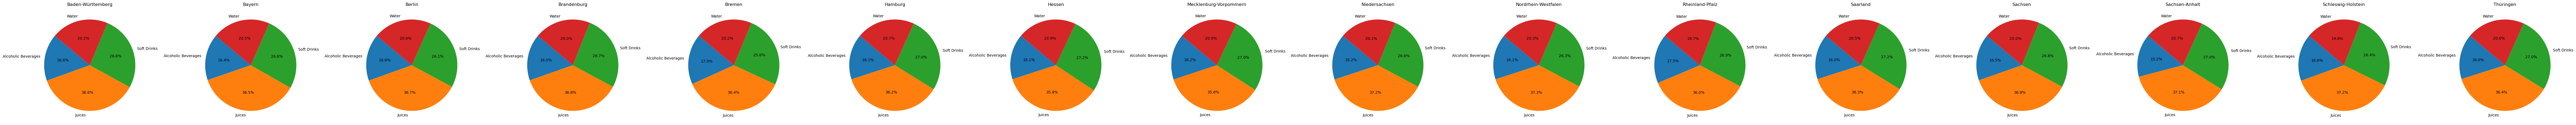

In [200]:
sample_size = 1000000
sampled_df = data.sample(n=sample_size, random_state=42)

# Group data by Region
regions = sampled_df.groupby("Region")


# Set figure size dynamically based on the number of regions
num_regions = len(regions)
fig_width = 6 * num_regions  # Width depends on the number of regions
fig_height = 6  # Set a constant height for readability

# Create subplots for each region
fig, axes = plt.subplots(1, num_regions, figsize=(fig_width, fig_height))

if len(regions) == 1:  # Ensure axes is iterable even if there's one region
    axes = [axes]

for ax, (region, group) in zip(axes, regions):
    # Aggregate Total_Price by Category within each region
    category_totals = group.groupby("Category")["Total_Price"].sum()
    
    # Plot Pie Chart
    ax.pie(
        category_totals, 
        labels=category_totals.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.tab10.colors
    )
    ax.set_title(f"{region}")

plt.tight_layout()
plt.show()

Plot above helps to visualise the sales of each category in a region

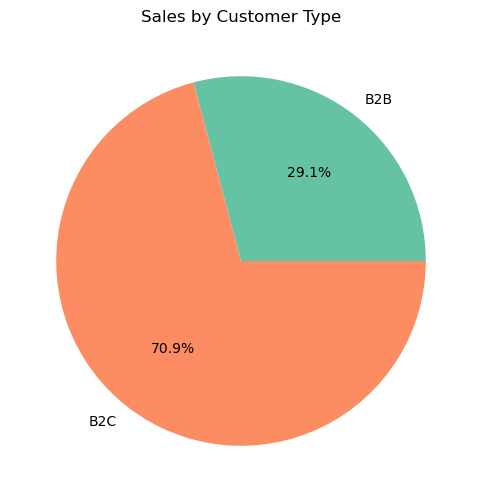

In [201]:
customer_sales = data.groupby('Customer_Type')['Total_Price'].sum()
colors = plt.cm.Set2.colors

# Plotting pie chart
plt.figure(figsize=(8, 6))
customer_sales.plot(kind='pie', autopct='%1.1f%%', colors=colors[:len(customer_sales)])
plt.title('Sales by Customer Type')
plt.ylabel('')
plt.show()

The plot above tells the sales with respect to type of customer B2C customer is more approaching than B2B

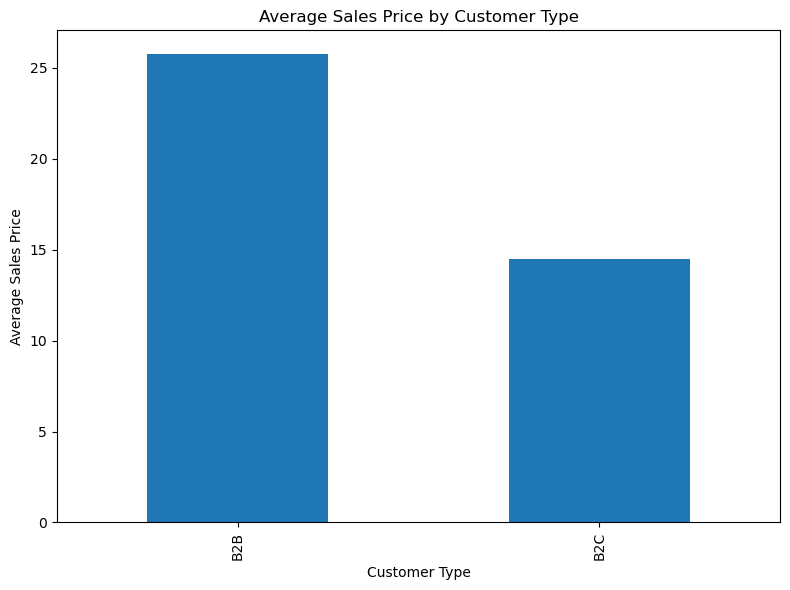

In [207]:
avg_price_by_customer = data.groupby('Customer_Type')['Total_Price'].mean()
plt.figure(figsize=(8, 6))
avg_price_by_customer.plot(kind='bar')
plt.title('Average Sales Price by Customer Type')
plt.ylabel('Average Sales Price')
plt.xlabel('Customer Type')
plt.tight_layout()
plt.show()

The plot above tells the sales with respect to type of customer B2C customer is more approaching than B2B

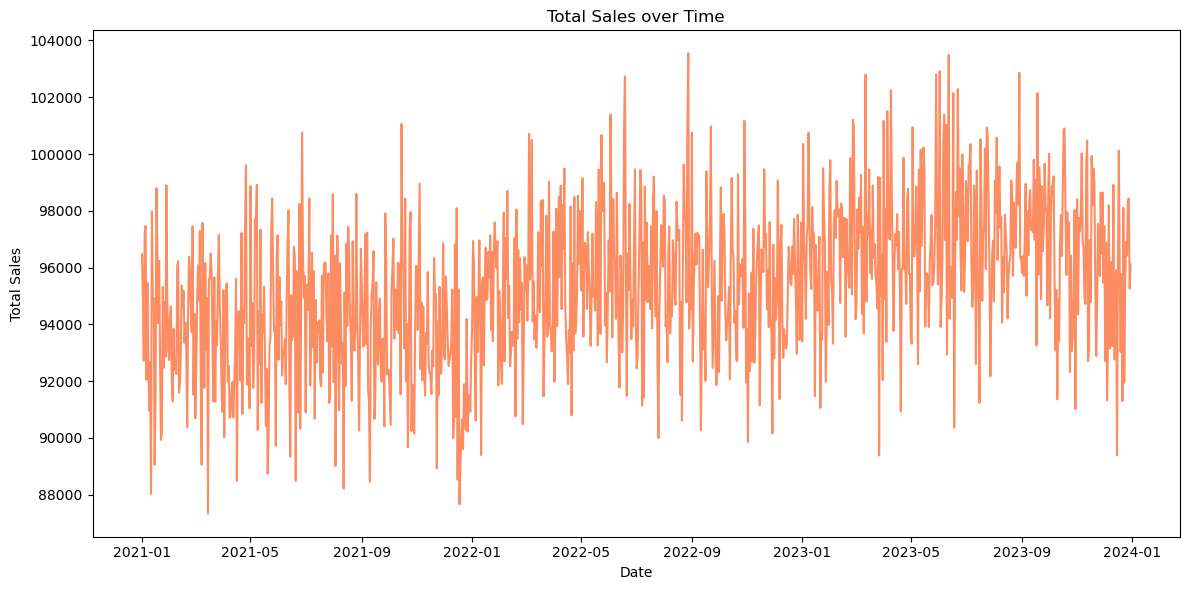

In [202]:
# Detecting sales with respect to time 
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
sales_by_date = data.groupby(data['Order_Date'].dt.date)['Total_Price'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, color=colors[1])
plt.title('Total Sales over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

The plot helps to visualise how sales differ with respect to time

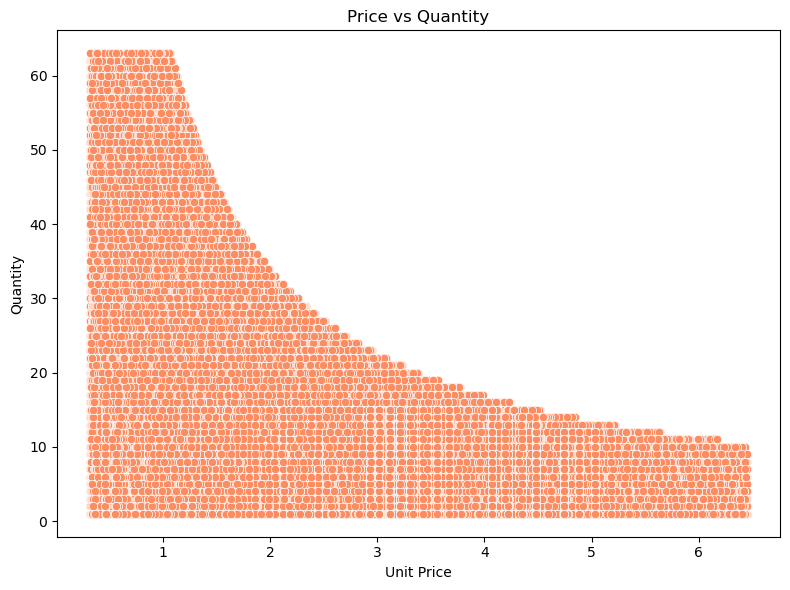

In [203]:
# Plotting how sales differ with respect to the quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unit_Price', y='Quantity', data=data, color=colors[1])
plt.title('Price vs Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

The plot above shows the quantity and price are exponentially distributed

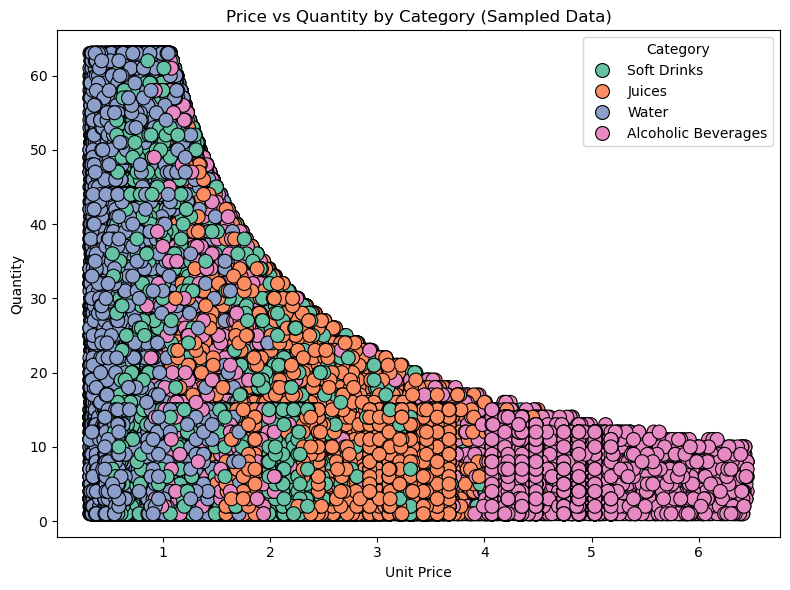

In [204]:
# Sample a subset of the data 
sample_size = 1000000  # You can adjust this based on memory and performance
sampled_df = data.sample(n=sample_size, random_state=42)

# Set the color palette for categories
colors = sns.color_palette("Set2", len(data["Category"].unique()))

# Create scatter plot for sampled data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unit_Price', y='Quantity', hue='Category', data=sampled_df, palette=colors, s=100, edgecolor='black')

# Set plot titles and labels
plt.title('Price vs Quantity by Category (Sampled Data)')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.legend(title='Category')
plt.tight_layout()

# Show plot
plt.show()

The plot above helps to visualise how price vary with qantity for each category

<Figure size 1200x800 with 0 Axes>

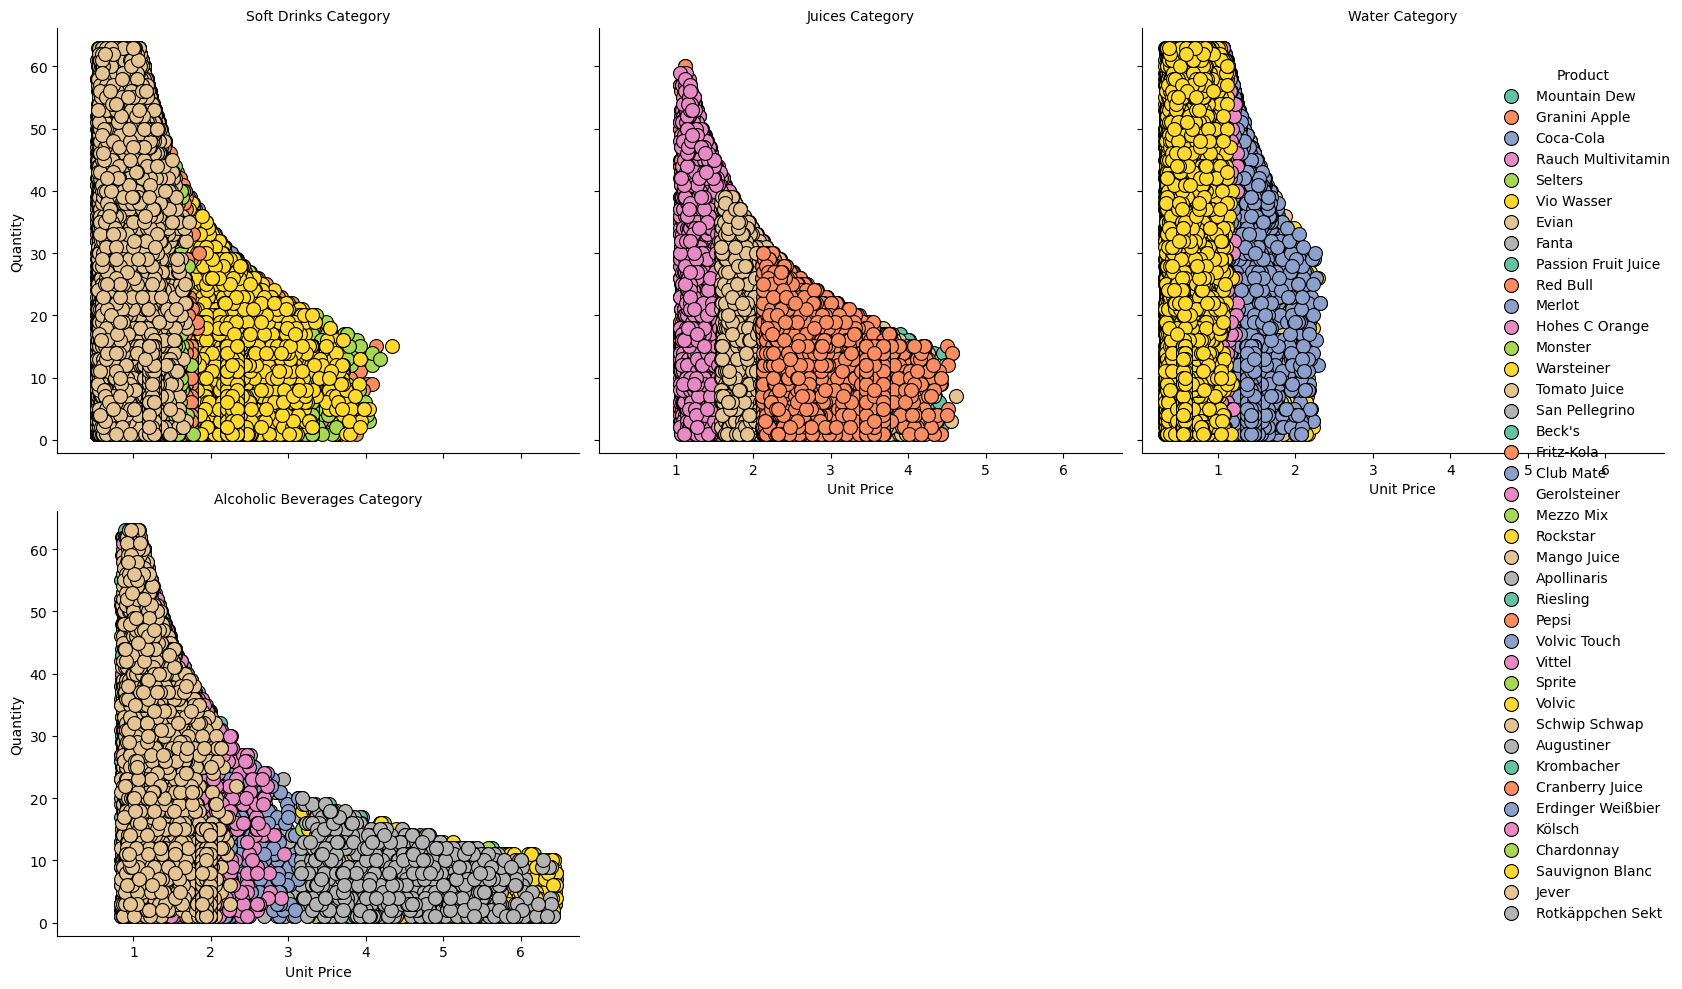

In [205]:
# Sample a subset of the data (e.g., 1 million entries for performance)
sample_size = 1000000  # Adjust based on system's capacity
sampled_df = data.sample(n=sample_size, random_state=42)

# Set color palette
colors = sns.color_palette("Set2", len(sampled_df["Category"].unique()))

# Create scatter plots for each category
plt.figure(figsize=(12, 8))

# Use seaborn's FacetGrid to plot scatter for each category and product combination
g = sns.FacetGrid(sampled_df, col="Category", hue="Product", col_wrap=3, height=5, palette="Set2")

# Plot the scatter plot
g.map(sns.scatterplot, "Unit_Price", "Quantity", s=100, edgecolor='black')

# Add titles and labels
g.set_axis_labels("Unit Price", "Quantity")
g.set_titles("{col_name} Category")
g.add_legend(title='Product')

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

The graph above shows how the price vary for each beverage under each category 

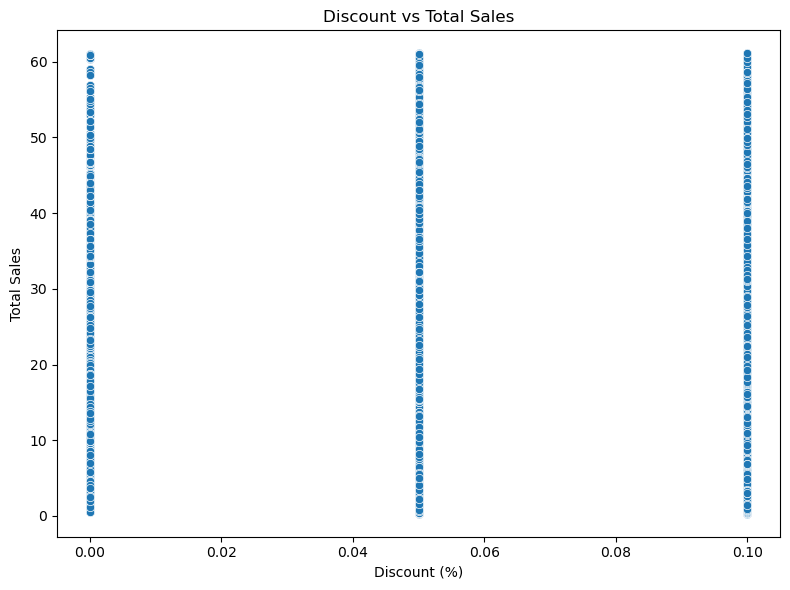

In [206]:
# Plotting discount with respect to sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Total_Price', data=data)
plt.title('Discount vs Total Sales')
plt.xlabel('Discount (%)')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

A discount is given a max of 10% on a beverage

### Model Development and prediction

In [208]:
df = data.copy()

In [209]:
#dropping columns not rwuired for prediction
df = df.drop(columns=['Order_ID', 'Customer_ID', 'Order_Date'])

In [210]:
# Doing on Label encoding to label categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
label_mappings = {}
for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Customer_Type
0 -> B2B
1 -> B2C

Column: Product
0 -> Apollinaris
1 -> Augustiner
2 -> Beck's
3 -> Chardonnay
4 -> Club Mate
5 -> Coca-Cola
6 -> Cranberry Juice
7 -> Erdinger Weißbier
8 -> Evian
9 -> Fanta
10 -> Fritz-Kola
11 -> Gerolsteiner
12 -> Granini Apple
13 -> Hohes C Orange
14 -> Jever
15 -> Krombacher
16 -> Kölsch
17 -> Mango Juice
18 -> Merlot
19 -> Mezzo Mix
20 -> Monster
21 -> Mountain Dew
22 -> Passion Fruit Juice
23 -> Pepsi
24 -> Rauch Multivitamin
25 -> Red Bull
26 -> Riesling
27 -> Rockstar
28 -> Rotkäppchen Sekt
29 -> San Pellegrino
30 -> Sauvignon Blanc
31 -> Schwip Schwap
32 -> Selters
33 -> Sprite
34 -> Tomato Juice
35 -> Vio Wasser
36 -> Vittel
37 -> Volvic
38 -> Volvic Touch
39 -> Warsteiner

Column: Category
0 -> Alcoholic Beverages
1 -> Juices
2 -> Soft Drinks
3 -> Water

Column: Region
0 -> Baden-Württemberg
1 -> Bayern
2 -> Berlin
3 -> Brandenburg
4 -> Bremen
5 -> Hamburg
6 -> Hessen
7 -> Mecklenburg-Vorpommern
8 -> Niedersachsen
9 -> Nordrhein-Westfa

In [211]:
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
4,0,11,3,0.87,35,0.10,27.40,0
7,0,36,3,0.43,13,0.05,5.31,5
9,0,8,3,1.38,3,0.05,3.93,5
10,1,21,2,0.99,11,0.00,10.89,1
11,0,13,1,1.52,8,0.05,11.55,1


#if required please install the packages
pip install xgboost lightgbm catboost

### Predicting if the customer is B2B or B2C

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix

In [214]:
X = df.drop('Customer_Type', axis=1)
y = df['Customer_Type']

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(5018252, 7) (1254564, 7)


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:02:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    235865
           1       1.00      1.00      1.00   1018699

    accuracy                           1.00   1254564
   macro avg       1.00      1.00      1.00   1254564
weighted avg       1.00      1.00      1.00   1254564

XGBoost AUC: 1.00



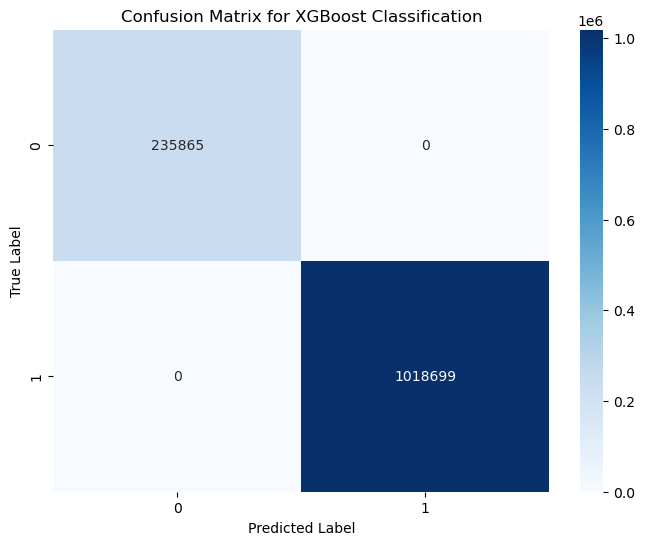

In [215]:
# Using XGBoost Model
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))
print(f"XGBoost AUC: {xgb_auc:.2f}\n")

# Generate confusion matrix
cm = confusion_matrix(y_test, xgb_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.title('Confusion Matrix for XGBoost Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The Model XG Boost gets and accuracy of 100% which is the not good we check next model, we can also fine tune hyperparameters, input features etc... 

[LightGBM] [Info] Number of positive: 4075309, number of negative: 942943
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.139724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 5018252, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.812097 -> initscore=1.463696
[LightGBM] [Info] Start training from score 1.463696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

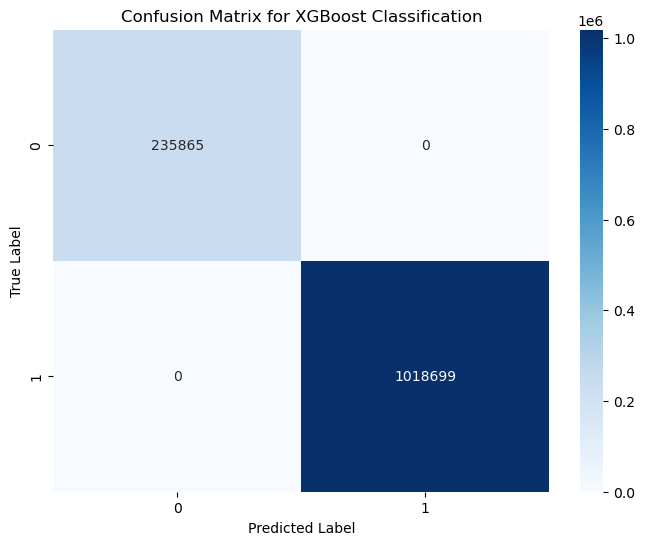

In [216]:
# Using LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)
lgb_auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])
print("LightGBM Classification Report:")
print(classification_report(y_test, lgb_preds))
print(f"LightGBM AUC: {lgb_auc:.2f}\n")

# Generate confusion matrix
cm = confusion_matrix(y_test, xgb_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=lgb_model.classes_, yticklabels=lgb_model.classes_)
plt.title('Confusion Matrix for XGBoost Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Same is the case with LightGBM Model

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    235865
           1       1.00      1.00      1.00   1018699

    accuracy                           1.00   1254564
   macro avg       1.00      1.00      1.00   1254564
weighted avg       1.00      1.00      1.00   1254564

CatBoost AUC: 1.00



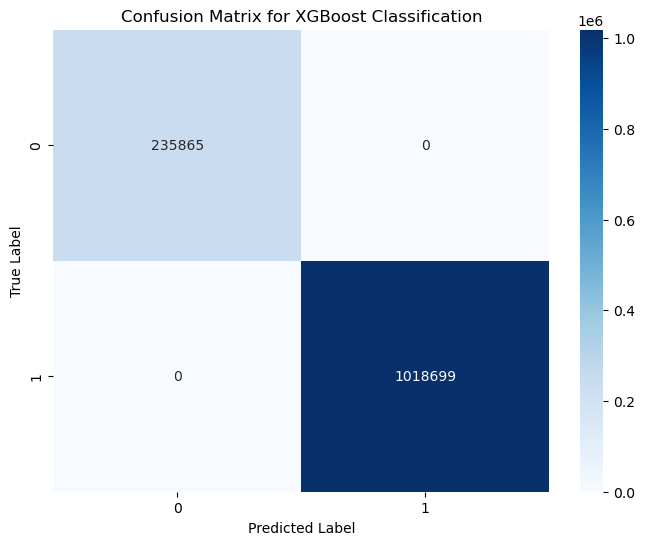

In [217]:
# Using CatBoost model
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_test)
cat_auc = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])
print("CatBoost Classification Report:")
print(classification_report(y_test, cat_preds))
print(f"CatBoost AUC: {cat_auc:.2f}\n")

# Generate confusion matrix
cm = confusion_matrix(y_test, xgb_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cat_model.classes_, yticklabels=cat_model.classes_)
plt.title('Confusion Matrix for XGBoost Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Same is the case with CatBoost model means we need to change model and finetune our features as well and aslo go for neural network for better results

### Predicting Price of the beverage

In [218]:
X = df.drop('Total_Price', axis=1)
y = df['Total_Price']
# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(5018252, 7) (1254564, 7)


In [219]:
# Using random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, rf_preds)
rmse = mean_squared_error(y_test, rf_preds, squared=False)
r2 = r2_score(y_test, rf_preds)

print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R²: {r2:.2f}")

Random Forest MAE: 0.00
Random Forest RMSE: 0.00
Random Forest R²: 1.00


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Regressor lead to overfitting XGBoost might perform better 

In [220]:
# Using KNeighbours Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {knn_mse}")
print(f"R2 Score: {knn_r2}")

Mean Squared Error: 0.5179571752895825
R2 Score: 0.9972648874068555


KNeighbours model performes better than Random Forest Regressor model

In [221]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train),
y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {xgb_mse}")
print(f"R2 Score: {xgb_r2}")

Mean Squared Error: 0.05140395883453457
R2 Score: 0.9997285574525206


XGBoostmodel perfomers even better with error even less as compared to KNeighbours model